In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_excel(r"C:\Users\Shaurya\Desktop\india_test.xlsx",index_col="Date",parse_dates=["Date"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2020-03-02 to 2021-05-14
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Daily Confirmed  439 non-null    int64
 1   Total Confirmed  439 non-null    int64
 2   Total Recovered  439 non-null    int64
 3   Total Deceased   439 non-null    int64
 4   Active Case      439 non-null    int64
dtypes: int64(5)
memory usage: 20.6 KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2020-03-02 to 2021-05-14
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Daily Confirmed  439 non-null    int64
 1   Total Confirmed  439 non-null    int64
 2   Total Recovered  439 non-null    int64
 3   Total Deceased   439 non-null    int64
 4   Active Case      439 non-null    int64
dtypes: int64(5)
memory usage: 20.6 KB


In [5]:
df.tail()

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case
Date,,,,,
2021-05-10,329491,22991820,19021163,249436,3721221
2021-05-11,348555,23340375,19376561,253634,3710180
2021-05-12,362632,23703007,19728566,257762,3716679
2021-05-13,343005,24046012,20073242,261762,3711008
2021-05-14,326014,24372026,20426092,265638,3680296


<AxesSubplot:xlabel='Date'>

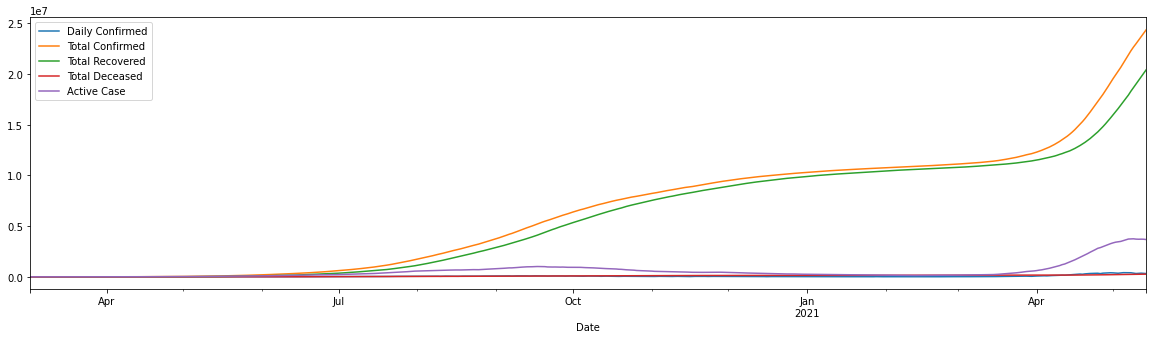

In [6]:
df.plot(figsize=(20,5))

In [7]:
df.tail(5)

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case
Date,,,,,
2021-05-10,329491,22991820,19021163,249436,3721221
2021-05-11,348555,23340375,19376561,253634,3710180
2021-05-12,362632,23703007,19728566,257762,3716679
2021-05-13,343005,24046012,20073242,261762,3711008
2021-05-14,326014,24372026,20426092,265638,3680296


In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
#Dickey Fuller Test
test = adfuller(df["Daily Confirmed"])
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])

ADF Statistic: -5.324450
p-value: 0.000005


In [10]:
#P value is less than .5 hence it is stationary

In [11]:
ts = df["Daily Confirmed"]

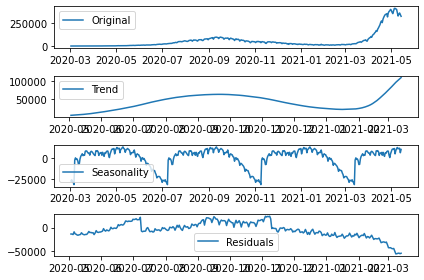

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,period=124)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

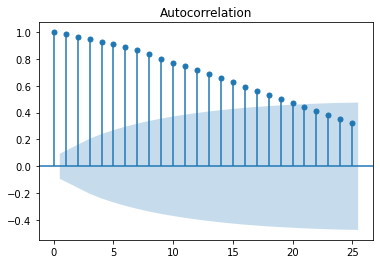

In [14]:
ACF = plot_acf(ts,lags=25)

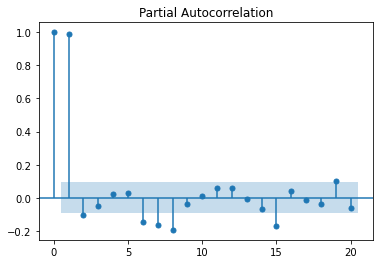

In [15]:
PACF = plot_pacf(ts,lags=20)

In [16]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [17]:
import itertools
import warnings
warnings.filterwarnings("ignore")

In [20]:
#Applied HyperParameters for time serise to get P,D,Q (Removed)

In [26]:
#SARIMAX

In [29]:
model=sm.tsa.statespace.SARIMAX(ts,order=(11, 0, 8),seasonal_order=(16, 0, 8, 12),enforce_stationarity=False,enforce_invertibility=False)
results=model.fit()

<AxesSubplot:xlabel='Date'>

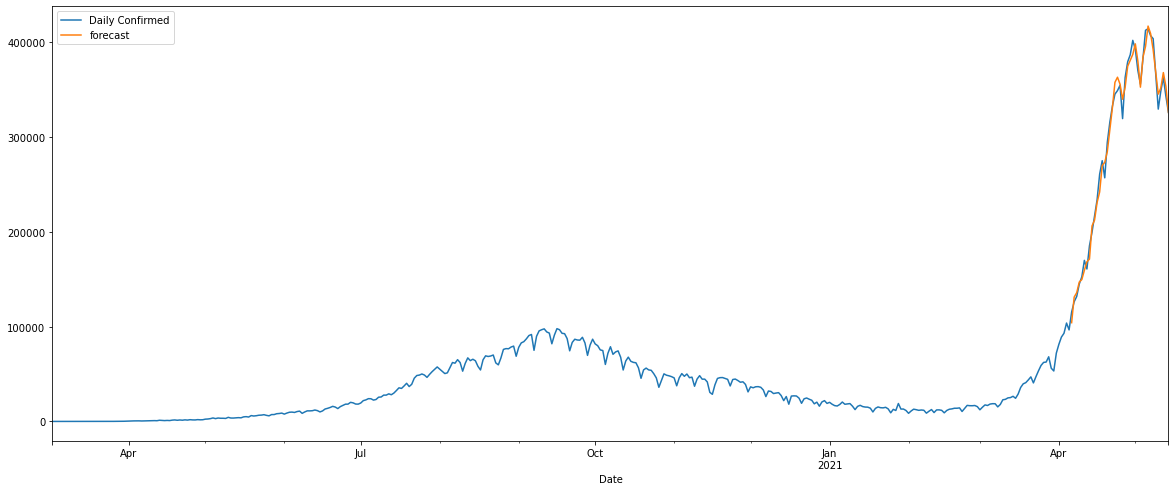

In [30]:
df['forecast']=results.predict(start=400,end=480)
df[['Daily Confirmed','forecast']].plot(figsize=(20,8))

In [31]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                      Daily Confirmed   No. Observations:                  439
Model:             SARIMAX(11, 0, 8)x(16, 0, 8, 12)   Log Likelihood               -2368.830
Date:                              Sat, 15 May 2021   AIC                           4825.660
Time:                                      10:33:17   BIC                           4978.068
Sample:                                  03-02-2020   HQIC                          4887.097
                                       - 05-14-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5850      0.912      0.642      0.521      -1.202       2.372
ar.L2          0.03

In [32]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,10)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case,forecast
2021-05-19,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-22,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

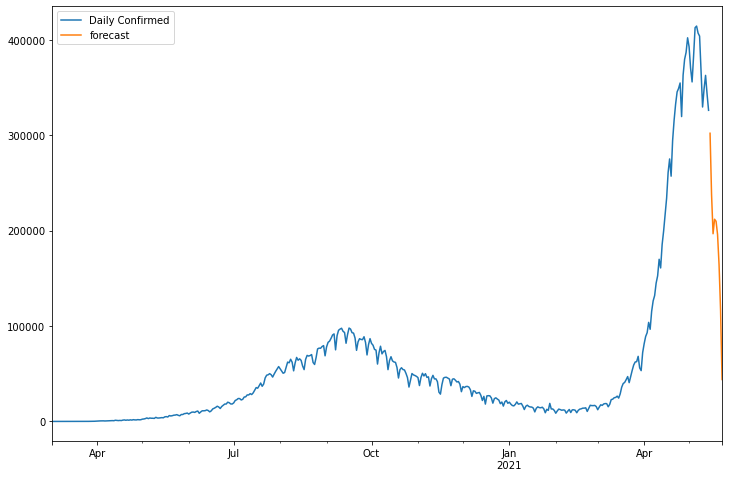

In [47]:
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 439, end = 448, dynamic= True)  
future_df[['Daily Confirmed', 'forecast']].plot(figsize=(12, 8))

In [48]:
future_df.to_excel('15 Daily case 11 0 8_16 0 8 12.xlsx')

In [49]:
future_df.tail(10)

,Daily Confirmed,Total Confirmed,Total Recovered,Total Deceased,Active Case,forecast
2021-05-14,326014,24372026,20426092,265638,4211572,NaN
2021-05-15,NaN,NaN,NaN,NaN,NaN,301974.330001
2021-05-16,NaN,NaN,NaN,NaN,NaN,237638.742510
2021-05-17,NaN,NaN,NaN,NaN,NaN,196668.511923
2021-05-18,NaN,NaN,NaN,NaN,NaN,211887.967385
2021-05-19,NaN,NaN,NaN,NaN,NaN,209770.912851
2021-05-20,NaN,NaN,NaN,NaN,NaN,195838.322819
2021-05-21,NaN,NaN,NaN,NaN,NaN,164313.503166
2021-05-22,NaN,NaN,NaN,NaN,NaN,117197.386955
2021-05-23,NaN,NaN,NaN,NaN,NaN,43921.274171
